In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wine = pd.read_csv('Wine.csv', header=None)
df_wine.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Linear Discriminant Analysis

In [6]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
    X_train_std[y_train==label], axis = 0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



###### Those are the mean vectors for each of the 13 features for each class

In [7]:
d = 13 #number of features
S_W = np.zeros((d,d))
for label, mv in zip (range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row-mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [8]:
print('Class label distribution: %s' % np.bincount(y_train)[1:]) #not uniformly distributed

Class label distribution: [40 49 35]


In [9]:
d = 13 #number of features
S_W = np.zeros((d,d))
for label, mv in zip (range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled Within-class scatter matrix: 13x13


In [14]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n* (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0],S_B.shape[1]))

Between-class scatter matrix: 13x13


In [15]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [20]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k:k[0], reverse= True)
print('Eigenvalues in decreasing order: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])
#be careful, it changed on the second edition, you can see it on his github

Eigenvalues in decreasing order: 

452.721581245
156.43636122
7.05575044266e-14
5.68434188608e-14
3.41129233161e-14
3.40797229523e-14
3.40797229523e-14
1.16775565372e-14
1.16775565372e-14
8.59477909861e-15
8.59477909861e-15
4.24523361436e-15
2.6858909629e-15


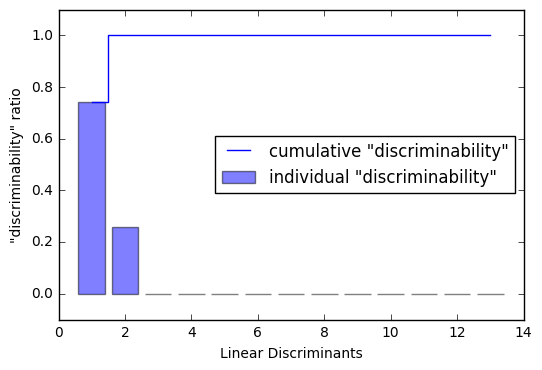

In [17]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted (eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha = 0.5, align = 'center', 
        label = 'individual "discriminability"')
plt.step(range(1,14), cum_discr, where = 'mid',
        label = 'cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.show()

In [19]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


### Projecting samples onto the new features space

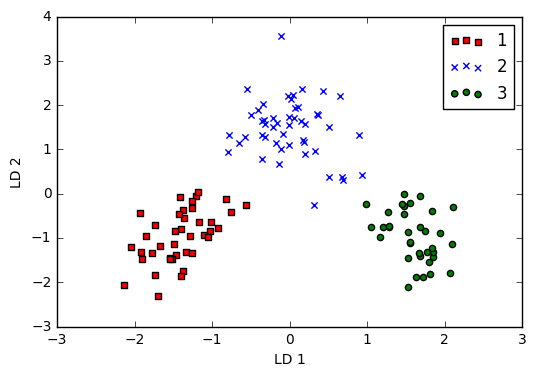

In [21]:
X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['s','x', 'o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],
                X_train_lda[y_train==l,1],
                c=c, label=l, marker = m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'upper right')
plt.show()